In [20]:
# SOAL 1 - GAUSS SEIDEL
import numpy as np

In [21]:
def isDiagonallyDominant(A):
    length = len(A)
    
    for i in range(length):
        pivot = 0
        nonpivot = 0
        for j in range(length):
            if i == j: pivot = np.abs(A[i][j])
            else: nonpivot += np.abs(A[i][j])
        
        if pivot <= nonpivot:
            return False
    
    return True

In [22]:
def gaussSeidel(A, B, X, epsilon, maxIter = 999, iter = 1):
    if iter > maxIter:
        print(f"Maximum iteration of {maxIter} had been reached!")
        return

    length = len(A)
    X_old = X.copy()
    
    for i in range(length):
        b = B[i]
        for j in range(length):
            if i != j: b -= A[i][j]*X[j]
        
        X[i] = b/A[i][i]
        
    print(f"iter: {iter} {X}")
    
    # calculate error
    ec = np.sqrt(np.dot(X-X_old, X-X_old))
    if ec >= epsilon:
        gaussSeidel(A, B, X, epsilon, maxIter, iter + 1)
        return
    
    print("convergen")    

In [23]:
Xs = [
    [
      [4, 2, -1],
      [1, -5, 2],
      [2, -1, -4]
    ],
    [
      [3, 4, 5],
      [-3, 7, -4],
      [1, -4, -2]
    ],
    [
      [9, -2, 3, 2],
      [2, 8, -2, 3],
      [-3, 2, 11, -4],
      [-2, 3, 2, 10]
    ]
]
Ys = [
    [41, -10, 1],
    [34, -32, 62],
    [55, -14, 12, -21]
]

epsilon = 0.022

for i in range(3):
    print(f"A: {Xs[i]}, {Ys[i]}")
    if isDiagonallyDominant(Xs[i]):
        gaussSeidel(Xs[i], Ys[i], np.zeros(len(Xs[i])), epsilon, 15)
    else:
        print("not diagonally dominant!")
    print("")

A: [[4, 2, -1], [1, -5, 2], [2, -1, -4]], [41, -10, 1]
iter: 1 [10.25    4.05    3.8625]
iter: 2 [9.190625   5.383125   2.99953125]
iter: 3 [8.30832031 4.86147656 2.68879102]
iter: 4 [8.49145947 4.7738083  2.80227766]
iter: 5 [8.56366526 4.83364412 2.8234216 ]
iter: 6 [8.53903334 4.83717531 2.81022284]
iter: 7 [8.53396806 4.83088275 2.80926334]
convergen

A: [[3, 4, 5], [-3, 7, -4], [1, -4, -2]], [34, -32, 62]
not diagonally dominant!

A: [[9, -2, 3, 2], [2, 8, -2, 3], [-3, 2, 11, -4], [-2, 3, 2, 10]], [55, -14, 12, -21]
iter: 1 [ 6.11111111 -3.27777778  3.35353535 -0.56515152]
iter: 2 [ 4.39046016 -1.79729938  2.40957938 -1.16463403]
iter: 3 [ 5.16732568 -2.00269881  2.44080351 -0.95388592]
iter: 4 [ 5.06444041 -2.04820201  2.49765287 -0.97218189]
iter: 5 [ 5.03944457 -2.02087972  2.47921505 -0.98169018]
iter: 6 [ 5.05377509 -2.02550619  2.48050699 -0.97769452]
convergen



In [24]:
# SOAL 2 - LEAST SQUARE REGRESSION
import numpy as np
import matplotlib.pyplot as plt

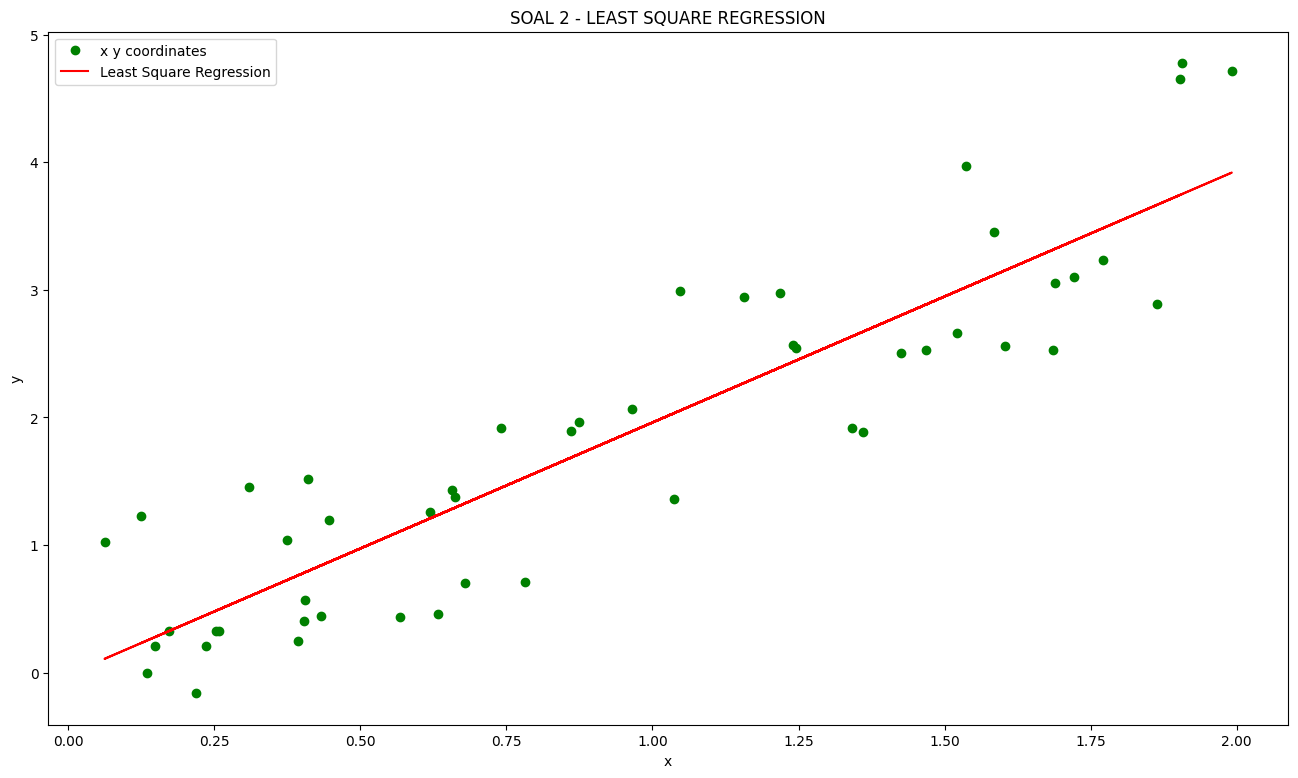

In [25]:
x = [1.3604935458559992, 1.5853985257024064, 0.5679347497479994, 0.21802392874941856, 0.06206493009274472, 1.6038707575944073, 1.5373131133875226, 1.4259588903280196, 0.43245973529077086, 0.257850612191316, 0.8605233835228834, 1.2181914607549382, 1.685409170644646, 0.12380139845637994, 0.13435858737521222, 0.4033370073012925, 0.619722978580614, 1.8628033810771025, 0.40953337540132173, 0.30874442757643994, 1.6891968832960647, 1.4690587356094642, 1.0467612052854245, 1.9070607586182264, 0.3931032996568269, 1.5213063293089268, 0.6792243360513193, 1.0368081016233708, 0.6336032973174668, 0.374905103792015, 1.771763274305583, 1.1559028146600263, 0.17306906153876445, 0.40602786961550885, 1.9021950999201134, 0.7404956567184318, 0.9651727271458386, 1.9916255775351712, 0.2532403679742896, 1.2463066512639314, 1.241263902486962, 1.7213322132140918, 1.3414349017801748, 0.8749630082448829, 0.2365239274541533, 0.6619637276533039, 0.14776060842856809, 0.44702252616842086, 0.7825174342129761, 0.6568730252477795]
y = [1.8860894486952637, 3.4538075220063913, 0.4326122937324488, -0.16109290897894835, 1.0258216227918515, 2.5614347377115334, 3.9711567124023173, 2.5050179041851806, 0.44187536608782496, 0.32763720038740907, 1.8914749598149787, 2.978721894531936, 2.5263464521598777, 1.2309986450932542, -0.0002015887018562701, 0.40845185338253454, 1.261882153097084, 2.890613004730457, 1.5142607191006958, 1.4558182978954157, 3.0535665102311498, 2.5305265858696826, 2.9943005644276735, 4.775595583754577, 0.2511451686187445, 2.662286088591588, 0.7013711036412655, 1.3574878178829441, 0.45879261586108844, 1.041383576988614, 3.2345537741888895, 2.9442588452869383, 0.32481178798514976, 0.5676922986388366, 4.6507103639541985, 1.9206250787747186, 2.0631617694637643, 4.718498033969695, 0.328918880734296, 2.5468066110409096, 2.56571088586923, 3.1028383540315225, 1.916718978555218, 1.9674896037631926, 0.20908513317900246, 1.3752289600324012, 0.21057773380247213, 1.1962232390302614, 0.7068252906124675, 1.428520921524234]

x = np.array(x)
y = np.array(y)

A = np.vstack([x, np.ones(len(x))]).T
pinv = np.linalg.pinv(A)
y_new = y[:, np.newaxis]

beta = np.dot(pinv, y_new)
f = beta[0]*x + beta[1]

plt.figure(figsize=(16,9))
plt.title("SOAL 2 - LEAST SQUARE REGRESSION")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x, y, "og")
plt.plot(x, f, "-r")
plt.legend(["x y coordinates", "Least Square Regression"], loc="upper left")
plt.show()

In [26]:
# SOAL 3 - NEWTON RAPHSON
import numpy as np

In [27]:
def f(x):
    return x**6 + 2*x**2 - 3

def g(x):
    return 6*x**5 + 4*x

def newtonRaphson(x, epsilon, maxIter = 999, iter = 1):
    if iter > maxIter:
        print(f"Maximum iteration of {maxIter} had been reached!")
        return

    x_new = x - (f(x)/g(x))
    print(f"Iteration of {iter}. new root = {x_new}")
    
    if (np.abs(f(x_new)) < epsilon):
        print("The root of equation is:", x_new)
        return
    
    newtonRaphson(x_new, epsilon, maxIter, iter+1)    

In [28]:
epsilon = 0.01
maxIter = 15
newtonRaphson(4, epsilon, maxIter)

Iteration of 1. new root = 3.330357142857143
Iteration of 2. new root = 2.7705278067251076
Iteration of 3. new root = 2.3014692834655897
Iteration of 4. new root = 1.9076486911265778
Iteration of 5. new root = 1.5780738506315775
Iteration of 6. new root = 1.3101344278134677
Iteration of 7. new root = 1.1168277838634215
Iteration of 8. new root = 1.0204619280744585
Iteration of 9. new root = 1.0006965918207418
The root of equation is: 1.0006965918207418


In [29]:
# SOAL 4 - RIEMANN INTEGRAL
import numpy as np

In [30]:
a = -3
b = 3
n = 30

def f(x):
    return 4*x**4 + 2*x**3 - 6*x

x = np.linspace(a, b, n)
y = f(x)
width = (b-a)/(n-1)

left_riemann = (sum(y[0:n-1]))*width
right_riemann = (sum(y[1:n]))*width
x_mid = (x[0: n-1] + x[1: n])/2
y_mid = f(x_mid)
mid_riemann = (sum(y_mid))*width

print("Left Riemann:", left_riemann)
print("Right Riemann:", right_riemann)
print("Mid Riemann:", mid_riemann)

Left Riemann: 384.4323034267851
Right Riemann: 399.328855150923
Mid Riemann: 387.26026006636687


In [31]:
a = -1*np.pi
b = 2*np.pi
n = 27

def f(x):
    return (np.sin(x))**2 + np.sin(x) + 2

x = np.linspace(a, b, n)
y = f(x)
width = (b-a)/(n-1)
trapezoid = (width/2)*(y[0] + 2*sum(y[1: n-1]) + y[n-1])
print("Trapezoid:", trapezoid)

Trapezoid: 21.583893023276122
